In [1]:
import re
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parse_individual_data(line):
    # Regular expression to extract the relevant data
    pattern = r'(\d+) (\d+): \(Individual { height: ([\d.]+), dev: ([\d.]+) \}, ([\d.]+)\)'
    match = re.match(pattern, line)
    if match:
        return {
            'generation': int(match.group(1)),
            'rank': int(match.group(2)),
            'height': float(match.group(3)),
            'deviation': float(match.group(4)),
            'fitness': float(match.group(5))
        }
    return None

def process_file(filename):
    generations = {}
    with open(filename, 'r') as file:
        for line in file:
            data = parse_individual_data(line)
            if data:
                gen = data['generation']
                if gen not in generations:
                    generations[gen] = []
                generations[gen].append(data)

    # Convert the dictionary to a sorted list of generations
    sorted_generations = [sorted(generation, key=lambda x: x['rank']) for generation in generations.values()]
    return sorted_generations

def plot_generations_interactive(generations_data):
    fig = go.Figure()

    # Create a color map for the generations
    colors = [f'rgba({r}, {g}, {b}, 1)' for r, g, b, _ in 255 * plt.cm.viridis(np.linspace(0, 1, len(generations_data)))]

    for i, generation in enumerate(generations_data):
        # Extracting the height, deviation, and fitness for each individual in the generation
        heights = [individual['height'] for individual in generation]
        deviations = [individual['deviation'] for individual in generation]
        fitnesses = [individual['fitness'] for individual in generation]

        fig.add_trace(go.Scatter3d(
            x=heights, y=deviations, z=fitnesses,
            mode='markers',
            marker=dict(size=5, color=colors[i], opacity=0.8),
            name=f'Generation {i}'
        ))

    # Set titles for the axes
    fig.update_layout(
        scene=dict(
            xaxis_title='Height',
            yaxis_title='Deviation',
            zaxis_title='Fitness'
        ),
        margin=dict(r=0, b=0, l=0, t=0),
        showlegend=False
    )

    fig.show()

def plot_property_vs_fitness(generations_data, x_property, y_property='fitness'):
    plt.figure(figsize=(10, 6))

    # Create a color map for the generations
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, len(generations_data)))

    for i, generation in enumerate(generations_data):
        x_values = [individual[x_property] for individual in generation]
        y_values = [individual[y_property] for individual in generation]

        plt.scatter(x_values, y_values, color=colors[i], label=f'Generation {i}')

    plt.xlabel(x_property.capitalize())
    plt.ylabel(y_property.capitalize())
    plt.title(f'{x_property.capitalize()} vs {y_property.capitalize()}')
    plt.show()

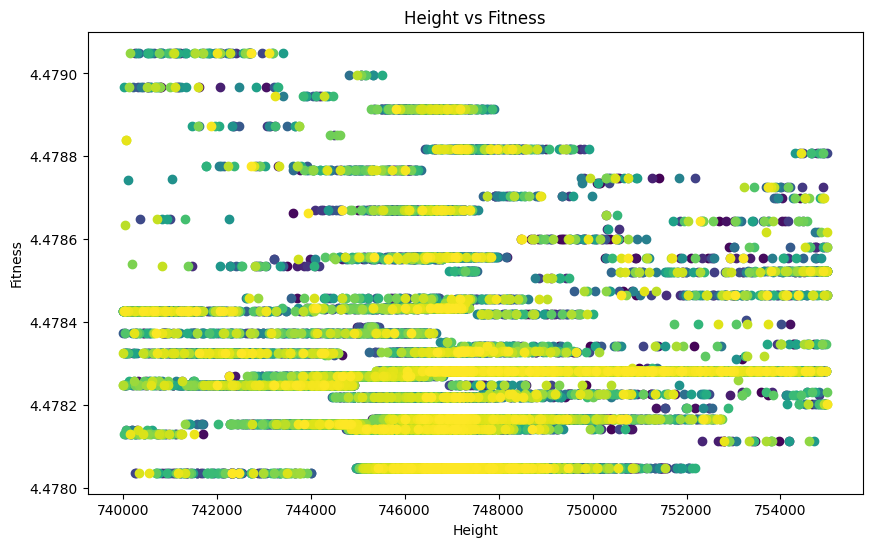

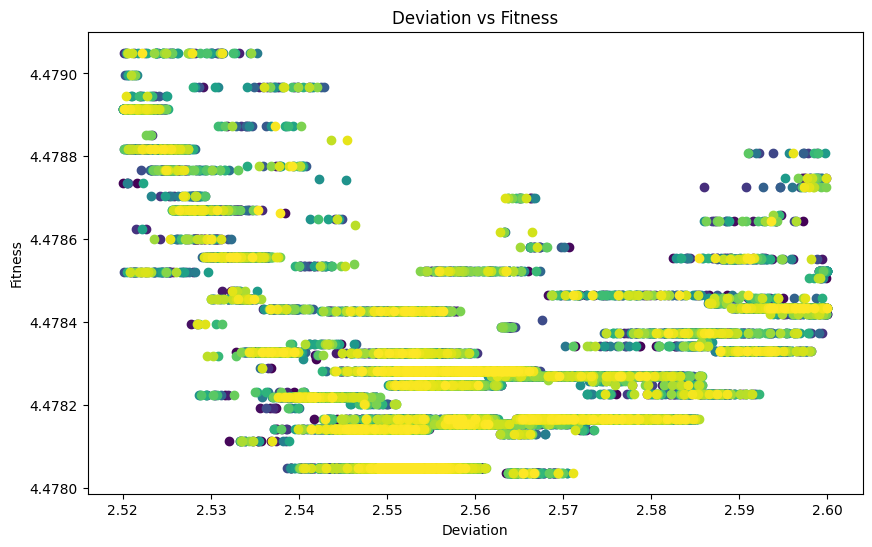

431


In [28]:
filename = 'output10.txt'
generations_data = process_file(filename)
plot_generations_interactive(generations_data)
plot_property_vs_fitness(generations_data, 'height')
plot_property_vs_fitness(generations_data, 'deviation')
print(len(generations_data))